## Credit Risk Management

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### Read and View the data

In [2]:
data = 'data/UCI_Credit_Card.csv'
df_data = pd.read_csv(data)

In [3]:
df_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


## About the dataset

FEATURES  

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = divorse, 0= others).

AGE: Age (year).

PAY0 — PAY6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY0 = the repayment status in September, 2005; PAY1 = the repayment status in August, 2005; . . .;PAY6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1- BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1-PAY_AMT2: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .; PAY_AMNT6 = amount paid in April, 2005.



## Analyzing the dataset

### Get a statistical summary of the data

In [5]:
df_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# The above data indicate that there are 25 features (both dependent and independent)
# The count row which is 30000 all through the column indicates that we don't have any missing data in the column
# to confirm this we use
df_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# That indicates that there are no missing values

In [8]:
df_data['default.payment.next.month'][df_data['AGE']<= 21].count()

67

In [9]:
# set the index since it has no index
df_data.index.name = 'ID'

In [10]:
df_data.index

RangeIndex(start=0, stop=30000, step=1, name='ID')

In [11]:
# check for more information from the labels
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [12]:
# Theabove information shows that the labels tha tnvolve finance is float whille the others are integers

Text(0.5, 1.0, 'Target Distribution')

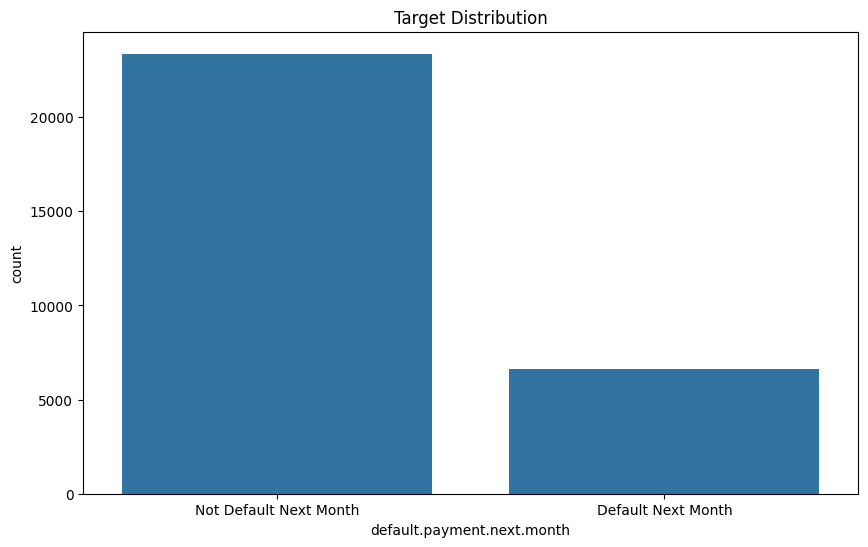

In [13]:
plt.figure(figsize=(10,6))
#sn.countplot('MARRIAGE',hue='default.payment.next.month',data=df_data)
sn.countplot(df_data, x='default.payment.next.month')
plt.xticks([0,1],labels=["Not Default Next Month", "Default Next Month"])
plt.title("Target Distribution")

### Analysis based on Age

In [14]:
age_count = df_data['AGE'].value_counts()
age_count

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

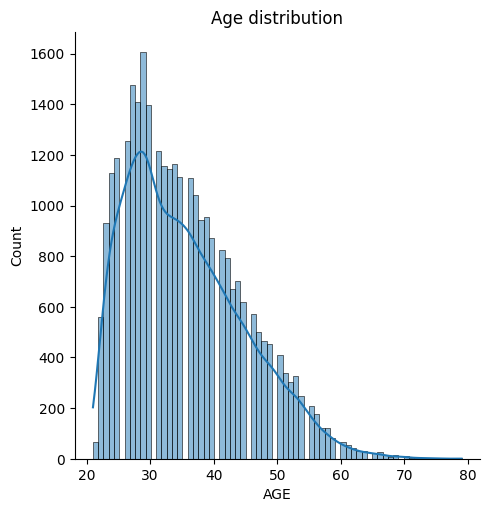

In [15]:
plt.figure(figsize=(6,6))
sn.displot(df_data['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

In [16]:
# get maximum age
df_data['AGE'].max()

79

In [17]:
# get the minium age
df_data['AGE'].min()

21

In [18]:
# get the average chances that those withing the ages of 21 will pay up credit by next month
df_data['ID'][df_data['AGE']==21].count()

67

In [19]:
# there are 67 people on record with age 21
# checking their chances of payment next month
df_data['default.payment.next.month'][df_data['AGE']== 21].mean()

0.208955223880597

In [20]:
# chances are a bit low that they will default

In [21]:
# for those that are 79 years old and above. Just one person
df_data['default.payment.next.month'][df_data['AGE']>= 79].mean()

0.0

In [22]:
# chances are they will will not default

In [23]:
# graph showing the age demographic

In [24]:
age_list = list(pd.Series(df_data['AGE']))

default_payment_next_month_list = list(pd.Series(df_data['default.payment.next.month']))

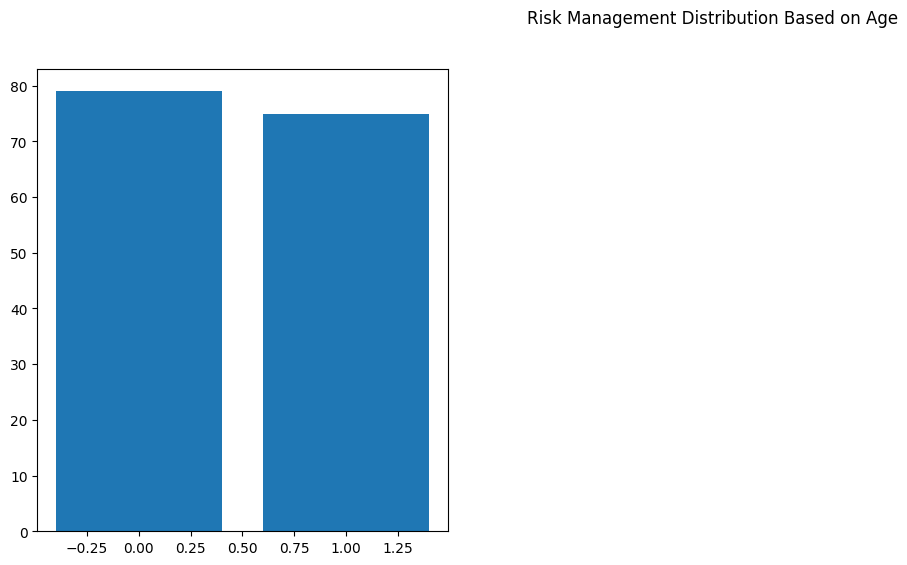

In [25]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.bar(default_payment_next_month_list, age_list)
plt.suptitle('Risk Management Distribution Based on Age')
plt.show()

### Analysis based on Education

##### Base on the data information
##### EDUCATION: 1->graduate school, 2->university, 3->high school, 4->others, 5->unknown, 6->unknown

In [26]:
df_data.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [27]:
# Assuming and setting the unknowned as graduate school
df_data['EDUCATION'] = df_data['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1})
df_data.EDUCATION.value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

Text(0.5, 1.0, 'EDUCATION Distribution')

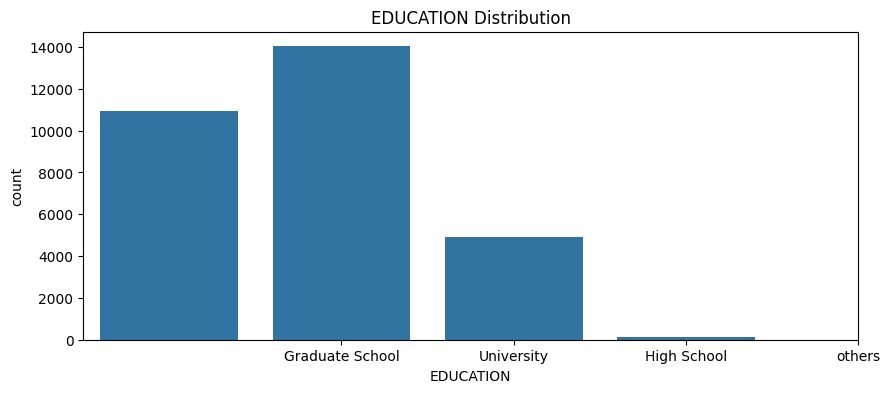

In [28]:
plt.figure(figsize=(10,4))
#sn.countplot('MARRIAGE',hue='default.payment.next.month',data=df_data)
sn.countplot(df_data, x='EDUCATION')
plt.xticks([1,2,3,4],labels=["Graduate School", "University","High School", "others"])
plt.title("EDUCATION Distribution")

### Analysis based on Marriage

In [29]:
df_data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

Text(0.5, 1.0, 'MARRIAGE Distribution')

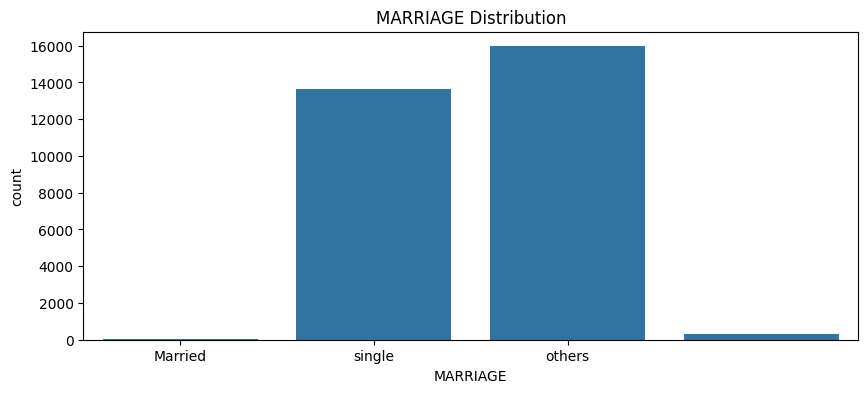

In [30]:
plt.figure(figsize=(10,4))
#sn.countplot('MARRIAGE',hue='default.payment.next.month',data=df_data)
sn.countplot(df_data, x='MARRIAGE')
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")

### Checking the credit limit

Text(0.5, 1.0, 'Credit Limit Distribution')

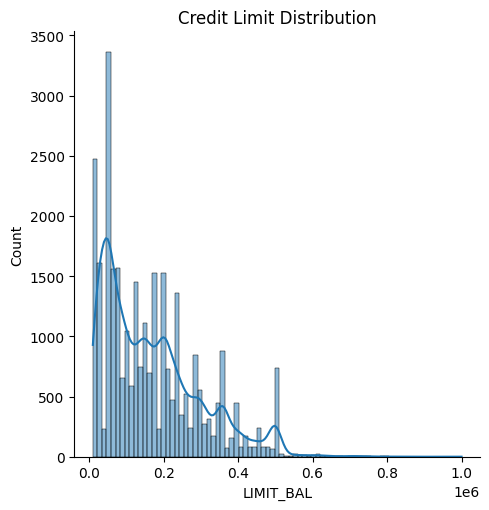

In [31]:
sn.displot(df_data.LIMIT_BAL, kde=True)
plt.title("Credit Limit Distribution")

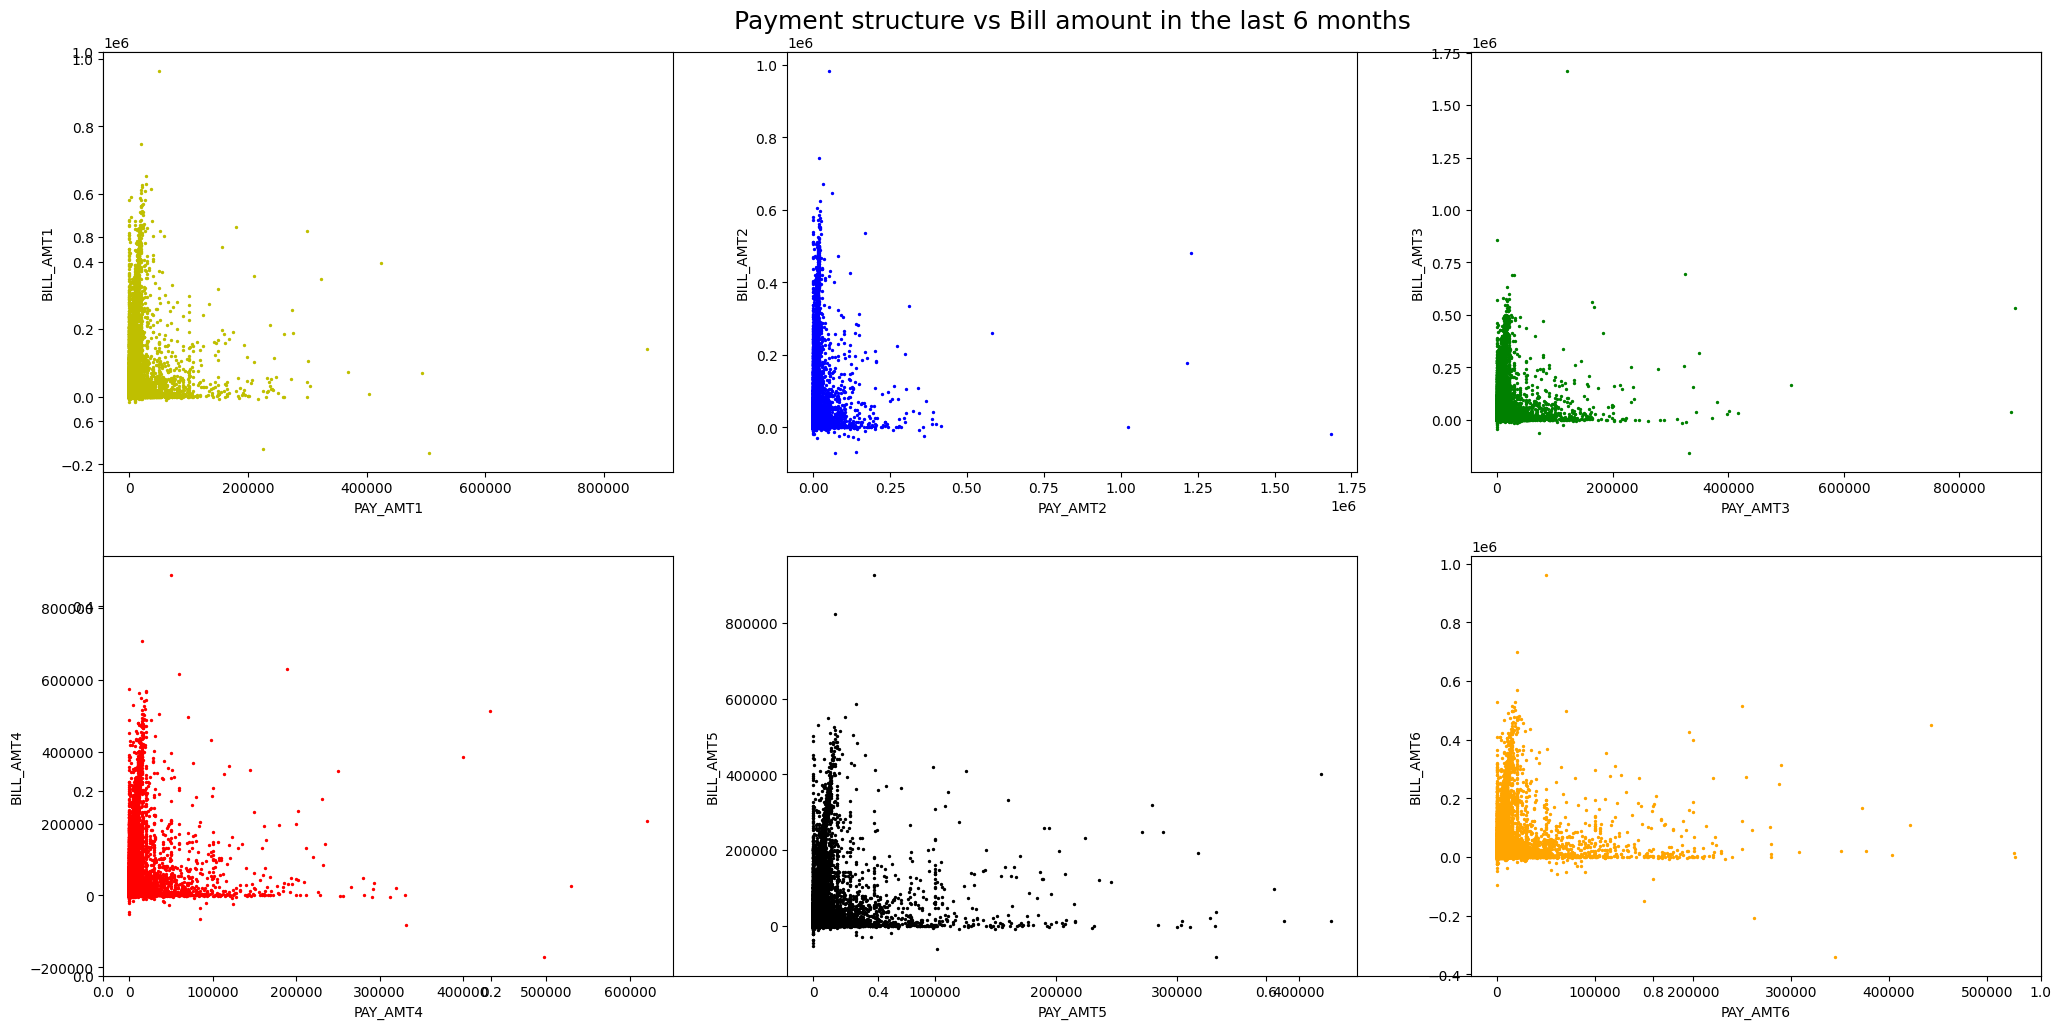

In [32]:
plt.subplots(figsize=(25,12))
plt.subplot(231)
plt.scatter(x=df_data.PAY_AMT1, y=df_data.BILL_AMT1, c='y', s=2)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df_data.PAY_AMT2, y=df_data.BILL_AMT2, c='b', s=2)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=18)

plt.subplot(233)
plt.scatter(x=df_data.PAY_AMT3, y=df_data.BILL_AMT3, c='g', s=2)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df_data.PAY_AMT4, y=df_data.BILL_AMT4, c='r', s=2)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df_data.PAY_AMT5, y=df_data.BILL_AMT5, c='black', s=2)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df_data.PAY_AMT6, y=df_data.BILL_AMT6, c='orange', s=2)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

# Data Modelling

#### Seperating the feature variables from the target variables

In [33]:
# Independnet features
X = df_data.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df_data['default.payment.next.month']
#X.head()

In [34]:
from sklearn.model_selection import train_test_split
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=.33, random_state=26)

In [35]:
# features training set
x_train_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
5599,5600,360000.0,1,3,1,37,-1,-1,-2,-2,...,0.0,0.0,0.0,860.0,0.0,0.0,0.0,0.0,860.0,0.0
8493,8494,300000.0,2,1,1,30,1,-2,-1,0,...,3973.0,3973.0,1244.0,1631.0,0.0,10000.0,0.0,1244.0,1631.0,2000.0
18288,18289,360000.0,1,3,1,56,-1,-1,-1,-1,...,1198.0,2087.0,1026.0,1026.0,7772.0,1198.0,2097.0,1026.0,1026.0,1019.0
13358,13359,150000.0,1,1,1,36,0,0,0,0,...,136378.0,139219.0,142172.0,145065.0,3800.0,3900.0,4000.0,4100.0,4100.0,5500.0
5186,5187,230000.0,1,1,2,39,0,0,0,0,...,20650.0,0.0,0.0,0.0,2500.0,2000.0,0.0,0.0,0.0,0.0


In [36]:
x_test_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
12804,12805,500000.0,2,1,2,34,-2,-2,-2,-2,...,14611.0,23169.0,6738.0,0.0,65732.0,14643.0,23169.0,6738.0,2159.0,0.0
8601,8602,240000.0,1,1,1,37,0,0,0,0,...,220804.0,217991.0,221981.0,214320.0,8494.0,7762.0,7176.0,7505.0,7273.0,7509.0
27203,27204,280000.0,1,3,3,42,1,-2,-1,0,...,5612.0,6917.0,10247.0,11822.0,0.0,6100.0,4000.0,3500.0,2500.0,2000.0
26055,26056,130000.0,2,1,2,26,-2,-2,-2,-2,...,0.0,0.0,402.0,0.0,0.0,0.0,0.0,402.0,0.0,2054.0
6522,6523,360000.0,2,1,2,26,-1,-1,-1,-1,...,416.0,190.0,190.0,66.0,125.0,418.0,190.0,0.0,66.0,151.0


In [37]:
# target training set
y_train_set = y_train_set.to_numpy()

In [38]:
# target testing set
y_test_set = y_test_set.to_numpy()

### Feature Scaling

In [39]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_set = scaler.fit_transform(x_train_set)
x_test_set = scaler.fit_transform(x_test_set)

In [40]:
# scaled training set
x_train_set

array([[-1.0811378 ,  1.48172436, -1.23959577, ..., -0.30779173,
        -0.26000938, -0.3043675 ],
       [-0.74665123,  1.01895606,  0.80671459, ..., -0.22898244,
        -0.20965272, -0.18547618],
       [ 0.38544828,  1.48172436, -1.23959577, ..., -0.24279308,
        -0.24916735, -0.24379237],
       ...,
       [-0.61315711,  2.56151706,  0.80671459, ...,  0.32572346,
         0.46758241, -0.13340178],
       [ 0.8466098 ,  2.56151706,  0.80671459, ..., -0.17221948,
        -0.11311944, -0.17715379],
       [ 0.73368879, -0.67786104, -1.23959577, ..., -0.30779173,
        -0.31617895, -0.3043675 ]])

## Building the Model

##### Models Used:  
Random Forest  
XGBoost  
Deep Neural Network

### Model Training

#### Without tuning the Hyperparameters

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Building the model
rnd_clf= RandomForestClassifier()

# Training the model with the training set dataset
rnd_clf.fit(x_train_set, y_train_set)

RandomForestClassifier()

In [42]:
y_pred_rf = rnd_clf.predict(x_test_set)

#### Checking Accuracy

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy Score: {}%".format((accuracy_score(y_test_set, y_pred_rf)*100)))

Accuracy Score: 81.65656565656566%


### Tuning the Hyperparameters and Retraining the model

##### Hyperparameters that were choosen  
n_estimators  
max_leaf_nodes  
n_jobs

In [44]:
# Building the model
rnd_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

# Training the built model with the dataset
rnd_clf.fit(x_train_set, y_train_set)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

The n_estimators which defines the number of trees in the forest was initially set to 500 with the max_leaf_nodes set to 16. This gave an accuracy of 81.33% It was discovered that more trees should be able to produce a more generalized and accurate result. But by choosing more number of trees, the time complexity of the Random Forest model also increased.

### Model Prediction

In [45]:
y_pred_rf = rnd_clf.predict(x_test_set)

### Checking the accuracy

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Accuracy Score: {}%".format((accuracy_score(y_test_set, y_pred_rf)*100)))

Accuracy Score: 81.46464646464646%


The above output shows that the accurac is 81% after tuning the hyper-parameter by setting the max_leaf_nodes to 16
and the n_estimator to 500, n_jobs to -1 compare to the previous model without tuning which was 76.4%

In [47]:
print(classification_report(y_test_set, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7698
           1       0.71      0.28      0.40      2202

    accuracy                           0.81      9900
   macro avg       0.77      0.62      0.65      9900
weighted avg       0.80      0.81      0.78      9900



From the classification report, the recall which is a measure to check correctly positive predicted outcomes out of the total number of positive outcomes it predicted as negative that were truly negative was 97% while those it predicted as positive that were truly positive was 27%. The model had a precision of 83% when predicting those that won't default while a precision of 68% when predicting those that would default by next month.

### Performance checking

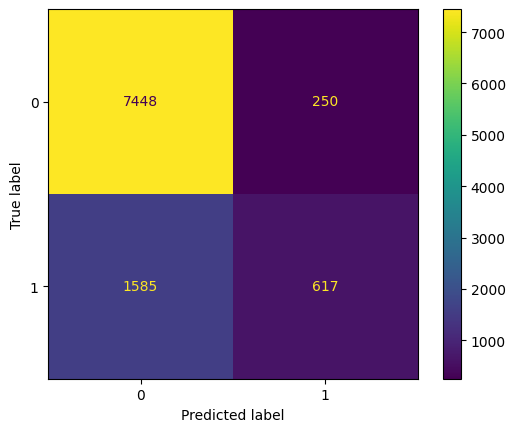

In [48]:
# Using confusoin metrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rnd_clf,x_test_set,y_test_set)

### Conclusion
#### True Positive(TP)  
From the confusion matrix graph, the number of true positive (correctly predicted by the model) is 340. Meaning that of the 6000+ record that was predicted by the model, 340 will pay back the loan by next month
#### False Positive(FP)  
It was observed from the graph that 162 of those that not pay by next month was wrongly predicted by the model by predicting that they would pay back the credit loan  
#### False Negative(FN)  
The model wrongly predicted that 935 of the client record will default by next month. 
#### True Negative(TN)  
4563 was correctly predicted by the model that they will default by next month

### XGBoost

In [49]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=6, eta=0.1, min_child_weight=1, colsample_bytree=0.8, seed=27)
#fitting the model
xgb_clf.fit(x_train_set,y_train_set)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [50]:
## Predicting the model
xgb_predict= xgb_clf.predict(x_test_set)

In [51]:
print("The accuracy of logit model is:", accuracy_score(y_test_set, xgb_predict))
print(classification_report(y_test_set,xgb_predict ))

The accuracy of logit model is: 0.8036363636363636
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7698
           1       0.68      0.22      0.33      2202

    accuracy                           0.80      9900
   macro avg       0.75      0.60      0.61      9900
weighted avg       0.78      0.80      0.76      9900



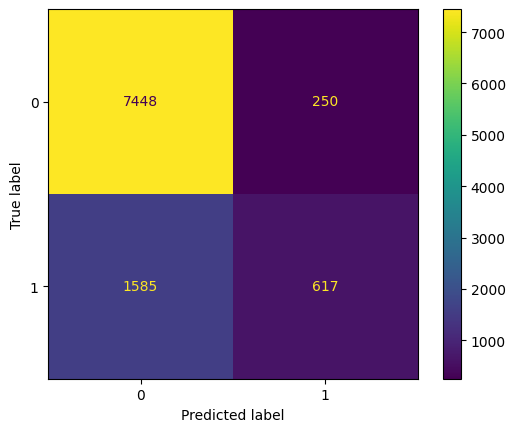

In [52]:
ConfusionMatrixDisplay.from_estimator(rnd_clf,x_test_set,y_test_set)

## Using Deep Neural Networks

In [53]:
import torch
from torch import nn
from torch import optim

In [54]:
import warnings
warnings.filterwarnings("ignore")


import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        # X = X.to_numpy()
        # y = y.to_numpy()
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(x_train_set, y_train_set)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(x_test_set, y_test_set)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

# Check it's working
for batch, (train_set, test_set) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {train_set.shape}")
    print(f"y shape: {test_set.shape}")
    break


"""
Batch: 1
X shape: torch.Size([50, 24])
y shape: torch.Size([50])
"""

Batch: 1
X shape: torch.Size([64, 24])
y shape: torch.Size([64])


'\nBatch: 1\nX shape: torch.Size([50, 24])\ny shape: torch.Size([50])\n'

## Neural Netowrk Implementation and Training

In [55]:
input_dim = 24
hidden_dim = 20
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
        # nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
        # self.layer_3 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))
        # x = torch.nn.functional.sigmoid(self.layer_3(x))

        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=24, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=1, bias=True)
)


## Hyperparameter Definition

In [56]:
learning_rate = 0.01

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Model Training

In [57]:
num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")

"""
Training Complete
"""

Training Complete


'\nTraining Complete\n'

## Prediction and Model Evaluation

In [58]:
"""
We're not training so we don't need to calculate the gradients for our outputs
"""

import itertools

y_pred = list()
y_test = list()
total = 0
correct = 0
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)
        predicted = np.where(outputs <= 0.5, 0, 1)
        predicted = list(itertools.chain(*predicted))
        y_pred.append(predicted)
        y_test.append(y)
        total += y.size(0)
        correct += (predicted == y.numpy()).sum().item()

print(f'Accuracy of the network on the 3300 test instances: {100 * correct // total}%')

Accuracy of the network on the 3300 test instances: 81%
